In [1]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import sys
sys.path.append('../../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [2]:
df = pd.read_csv('../../../data/handlebar/processed_segments_overlap_50.csv') 
df.drop('Unnamed: 0', axis=1, inplace=True)
df


,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,8.743622,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0.0,8.762772,8.762772,8.748413,8.767563,8.729263,8.695740,8.724472,8.767563,8.767563,...,8.753204,8.772354,8.786728,8.781937,8.786728,8.777145,8.738831,8.820236,8.738831,8.757996
2,0.0,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,8.801086,8.767563,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
3,0.0,8.781937,8.753204,8.801086,8.753204,8.829819,8.753204,8.786728,8.815445,8.762772,...,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,8.791504,8.772354
4,0.0,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,8.757996,8.777145,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9312,1.0,-1.575378,5.295975,5.295975,16.682800,19.517532,14.781799,14.609421,7.469910,11.252747,...,-6.689407,2.274490,4.649536,-18.933350,-24.708160,-21.212631,-3.002335,10.764328,19.019547,19.871872
9313,1.0,0.100555,-6.871353,3.026276,17.348389,15.734695,13.632584,13.632584,14.556747,12.014099,...,-22.385788,-30.980972,-23.218964,-6.301544,14.973343,18.669983,26.542114,38.690308,48.295837,53.400284
9314,1.0,6.004654,9.461884,15.811310,22.572540,20.719421,20.719421,7.910446,0.928955,-0.574615,...,4.922485,19.182343,20.283676,20.283676,12.129028,-3.567368,-3.567368,1.077393,9.370911,10.749970
9315,1.0,60.429657,25.072083,9.495407,-14.068329,-19.512741,-11.065994,2.049438,2.049438,10.376465,...,0.210693,0.804459,0.804459,11.267120,10.807434,8.063675,4.228165,4.505890,19.072205,19.072205


In [3]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], 
                                                                    test_size=0.2, 
                                                                    random_state=RANDOM_SEED)


In [4]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 1:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 1:])
test_data_scaled = scaler.transform(test_data.iloc[:, 1:])



In [5]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[1:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[1:])
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
train_data_scaled_df.head()

,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,Acc-Z_10,...,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100,curb_scene
0,0.099842,0.367573,-0.760735,-0.741110,-0.643996,1.478013,1.460586,0.377973,-1.298170,-2.613329,...,-0.582613,-1.255213,-0.701392,0.471675,0.901263,0.321502,-0.614684,0.125772,0.418495,0.0
1,0.287473,-0.438213,-0.262225,-0.632199,0.733360,0.425447,0.325230,0.411709,-0.423649,0.776224,...,-0.527615,0.937265,1.770801,1.560933,-0.131658,-1.879847,-1.206281,-0.206123,0.528233,0.0
2,-0.889006,-0.240796,0.149586,0.175351,-0.117633,-0.764769,-1.020560,-0.874950,-0.199176,0.381914,...,-0.216459,-0.520273,-0.635812,-0.342957,0.028676,1.100680,0.824921,-0.265390,-0.858003,0.0
3,1.466225,1.286168,-0.577708,-1.422806,-0.696546,0.911753,0.885006,-0.045683,-1.041988,-0.455054,...,-3.053017,1.231087,2.014817,-2.399102,-6.967440,-6.682476,-0.651555,0.426846,-4.315520,0.0
4,-0.690028,-0.464805,1.045457,0.830425,0.002728,-1.053255,-0.338514,0.800059,0.798846,0.158502,...,-0.794318,-1.508160,-1.290846,0.791125,2.443709,1.781598,-0.239281,-0.758489,-0.189899,0.0


In [6]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
# Example usage: Accessing the original index
# print(normal_test_data_scaled.index)
# print(abnormal_test_data_scaled.index)

In [7]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")

In [8]:
from tensorflow.keras.saving import register_keras_serializable

@register_keras_serializable()
class AutoEncoder(Model):
    def __init__(self, name='auto_encoder', **kwargs):
        super(AutoEncoder, self).__init__(name=name, **kwargs)
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(256, activation='tanh'),
            tf.keras.layers.Dense(224, activation='tanh'),
            tf.keras.layers.Dense(160, activation='tanh'),
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(160, activation='tanh'),
            tf.keras.layers.Dense(224, activation='tanh'),
            tf.keras.layers.Dense(256, activation='tanh'),
            tf.keras.layers.Dense(100, activation='tanh'),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def get_config(self):
        config = super().get_config()
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [9]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mae')

In [20]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, 
                    normal_train_data_scaled,
                    epochs=200, 
                    batch_size=512,
                    validation_split=0.3, 
                    shuffle=True, 
                    callbacks=[early_stopping])

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.4914 - val_loss: 0.4520
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.4506 - val_loss: 0.4204
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4237 - val_loss: 0.3958
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3945 - val_loss: 0.3767
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3837 - val_loss: 0.3616
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3588 - val_loss: 0.3495
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3545 - val_loss: 0.3395
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3415 - val_loss: 0.3310
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3368 - val_loss: 0.3235
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3315 - val_loss: 0.3168
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3173 - val_loss: 0.3108
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

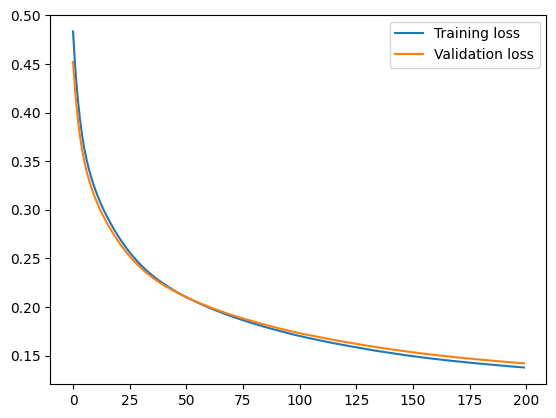

In [23]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [13]:
from keras import ops
model.save('autoencoder_best.keras')

In [14]:
load_model = tf.keras.models.load_model('autoencoder_best.keras')

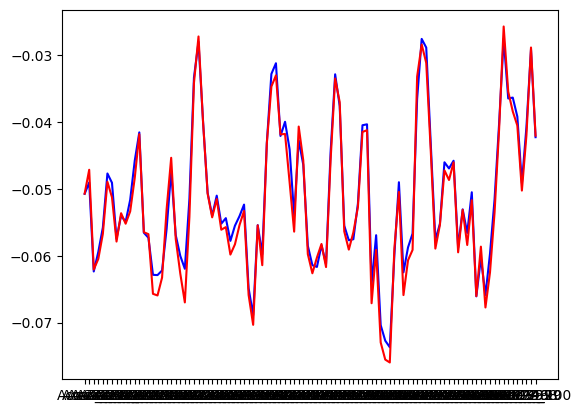

In [15]:
#normal data
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 100 units
encoder_out = load_model.encoder(normal_test_data_scaled).numpy()
decoder_out = load_model.decoder(encoder_out).numpy()
plt.plot(normal_test_data_scaled.iloc[1001], 'blue')
plt.plot(decoder_out[1001], 'red')

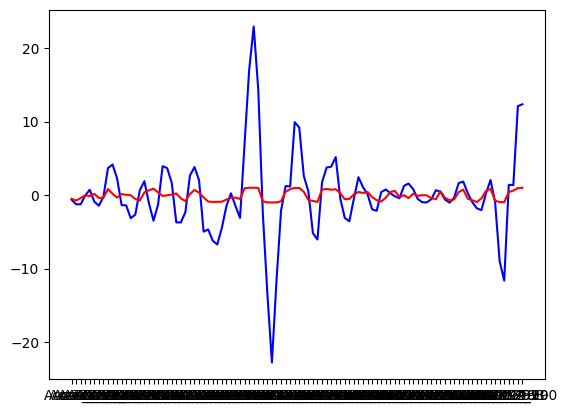

In [16]:
# abnormal data
encoder_out_abnormal = load_model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = load_model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled.iloc[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(array([476.,  47.,  40., 178., 163., 122., 109.,  86.,  86.,  63.,  67.,
         51.,  49.,  33.,  35.,  21.,  27.,  22.,  18.,  13.,  13.,  17.,
          4.,   7.,   6.,   4.,   5.,   2.,   3.,   7.,   2.,   1.,   2.,
          3.,   1.,   3.,   2.,   0.,   1.,   0.,   0.,   1.,   1.,   1.,
          2.,   0.,   0.,   1.,   0.,   1.]),
 array([9.35283082e-04, 2.07019448e-02, 4.04686071e-02, 6.02352694e-02,
        8.00019354e-02, 9.97685939e-02, 1.19535260e-01, 1.39301926e-01,
        1.59068584e-01, 1.78835243e-01, 1.98601902e-01, 2.18368575e-01,
        2.38135234e-01, 2.57901907e-01, 2.77668566e-01, 2.97435224e-01,
        3.17201883e-01, 3.36968541e-01, 3.56735200e-01, 3.76501858e-01,
        3.96268517e-01, 4.16035205e-01, 4.35801864e-01, 4.55568522e-01,
        4.75335181e-01, 4.95101839e-01, 5.14868498e-01, 5.34635127e-01,
        5.54401815e-01, 5.74168444e-01, 5.93935132e-01, 6.13701761e-01,
        6.33468449e-01, 6.53235137e-01, 6.73001766e-01, 6.92768455e-01,
        7.

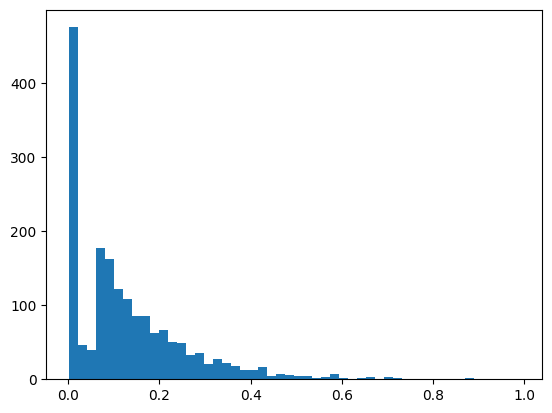

In [17]:
# Reconstruct normal test data and calculate loss
reconstruction_normal = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction_normal, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


(array([1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 2., 1., 0., 1., 3., 3., 2.,
        0., 3., 1., 5., 4., 1., 2., 1., 0., 3., 2., 5., 3., 1., 2., 3., 1.,
        2., 3., 1., 0., 1., 0., 1., 2., 0., 1., 1., 1., 0., 0., 0., 1.]),
 array([0.37540591, 0.44067749, 0.50594908, 0.57122064, 0.63649225,
        0.70176387, 0.76703542, 0.83230698, 0.8975786 , 0.96285021,
        1.02812171, 1.09339333, 1.15866494, 1.22393656, 1.28920817,
        1.35447967, 1.41975129, 1.4850229 , 1.55029452, 1.61556602,
        1.68083763, 1.74610925, 1.81138074, 1.87665236, 1.94192398,
        2.00719547, 2.07246733, 2.1377387 , 2.20301032, 2.26828194,
        2.33355331, 2.39882517, 2.46409655, 2.5293684 , 2.59463978,
        2.65991163, 2.72518301, 2.79045439, 2.85572624, 2.92099762,
        2.98626947, 3.05154085, 3.11681271, 3.18208408, 3.24735546,
        3.31262732, 3.37789869, 3.44317055, 3.50844193, 3.57371378,
        3.6389854 ]),
 <BarContainer object of 50 artists>)

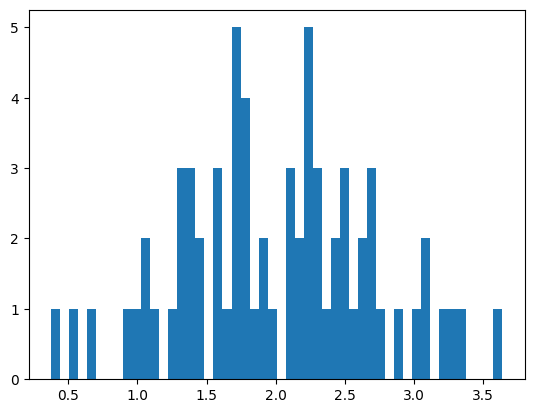

In [18]:
# Reconstruct abnormal test data and calculate loss
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

In [19]:
# threshold auswählen nach business logic
threshold = np.mean(train_loss) + 2.5*np.std(train_loss)
threshold

np.float32(0.4756061)

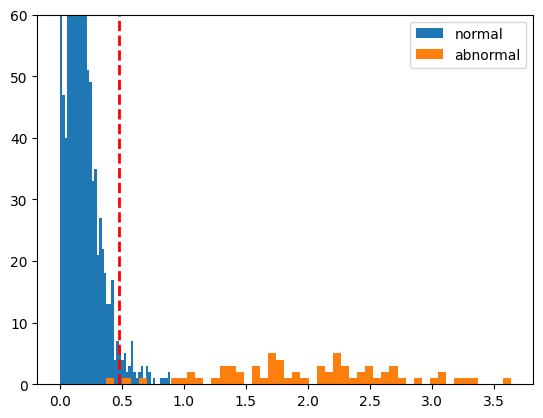

In [20]:
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threshold))
plt.show()

In [ ]:
preds_normal=tf.math.less(train_loss, threshold)
correct = tf.math.count_nonzero(preds_normal)
false_predictions_normal = [i for i, x in enumerate(preds_normal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_normal))
print("False Predictions index: ", false_predictions_normal)

In [ ]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threshold)
correct = tf.math.count_nonzero(preds_abnormal)
false_predictions_abnormal = [i for i, x in enumerate(preds_abnormal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))